<a href="https://colab.research.google.com/github/AlfarizaRasendria/BBC-News-Classification-using-Recurrent-Neural-Network/blob/main/Muhammad_Alfariza_Rasendira_Proyek_Pertama_Membuat_Model_NLP_dengan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Submission Proyek Pertama Membuat Model NLP dengan TensorFlow**

**Nama : Muhammad Alfariza Rasendria**

Email : rasendria.alfariza18@gmail.com

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [ ]:
!kaggle datasets download -d hgultekin/bbcnewsarchive --force

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 130MB/s]


In [ ]:
import zipfile

file_path = '/content/bbcnewsarchive.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/tmp/')

In [ ]:
base_dir = '/tmp'

In [ ]:
df = pd.read_csv(f'{base_dir}/bbc-news-data.csv', sep='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
df.shape

(2225, 4)

Distribusi kelas:
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64
5


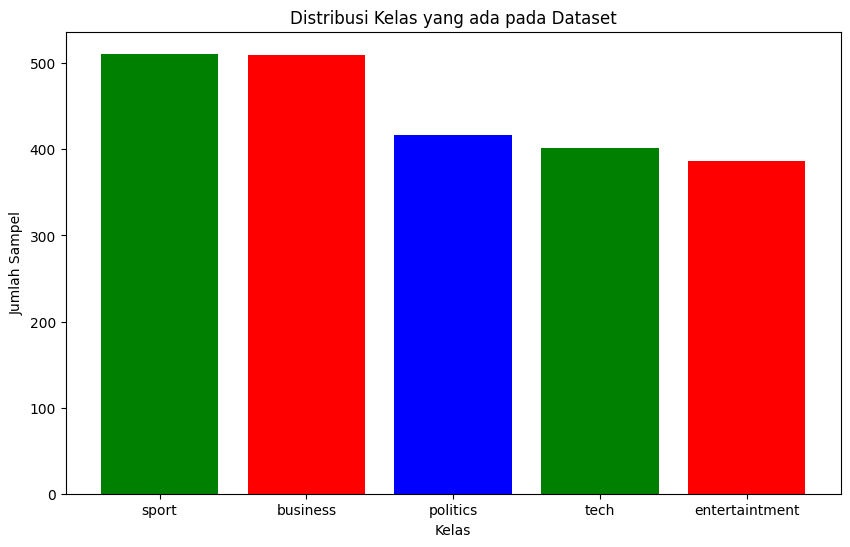

In [ ]:
import matplotlib.pyplot as plt
class_distribution = df['category'].value_counts()
print("Distribusi kelas:")
print(class_distribution)
print(len(class_distribution))

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color=['green', 'red','blue'])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas yang ada pada Dataset')
plt.xticks(class_distribution.index, ['sport', 'business','politics','tech','entertaintment'])
plt.show()

In [ ]:
df.isnull().sum()

category    0
filename    0
title       0
content     0
dtype: int64

In [ ]:
df = df.drop(['filename','title'],axis=1)
df

,category,content
0,business,Quarterly profits at US media giant TimeWarne...
1,business,The dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...
3,business,British Airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...
...,...,...
2220,tech,BT is introducing two initiatives to help bea...
2221,tech,Computer users across the world continue to i...
2222,tech,A new European directive could put software w...
2223,tech,The man making sure US computer networks are ...


In [ ]:
category = pd.get_dummies(df.category)
df_processed = pd.concat([df, category], axis=1)
df_processed = df_processed.drop(columns='category')
df_processed

,content,business,entertainment,politics,sport,tech
0,Quarterly profits at US media giant TimeWarne...,True,False,False,False,False
1,The dollar has hit its highest level against ...,True,False,False,False,False
2,The owners of embattled Russian oil giant Yuk...,True,False,False,False,False
3,British Airways has blamed high fuel prices f...,True,False,False,False,False
4,Shares in UK drinks and food firm Allied Dome...,True,False,False,False,False
...,...,...,...,...,...,...
2220,BT is introducing two initiatives to help bea...,False,False,False,False,True
2221,Computer users across the world continue to i...,False,False,False,False,True
2222,A new European directive could put software w...,False,False,False,False,True
2223,The man making sure US computer networks are ...,False,False,False,False,True


In [ ]:
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
stop_words.update(punctuation)

def remove_stopwords_nltk(text):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_processed['content'] = df_processed['content'].apply(remove_stopwords_nltk)

In [ ]:
def remove_punctuation(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(text)
    return " ".join(words)

In [ ]:
df_processed['content']=df_processed['content'].apply(remove_punctuation)

In [ ]:
df_processed['content'] = df_processed['content'].str.lower()

In [ ]:
df_processed['content']

0       quarterly profits us media giant timewarner ju...
1       dollar hit highest level euro almost three mon...
2       owners embattled russian oil giant yukos ask b...
3       british airways blamed high fuel prices 40 dro...
4       shares uk drinks food firm allied domecq risen...
                              ...                        
2220    bt introducing two initiatives help beat rogue...
2221    computer users across world continue ignore se...
2222    new european directive could put software writ...
2223    man making sure us computer networks safe secu...
2224    online role playing games time consuming enthr...
Name: content, Length: 2225, dtype: object

In [ ]:
sentiment = df_processed['content'].values
label = df_processed[['business', 'entertainment', 'politics','sport','tech']].values

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in str(i).split():
            words.append(j.strip())
    return words

corpus = get_corpus(df_processed.content)
corpus

['quarterly',
 'profits',
 'us',
 'media',
 'giant',
 'timewarner',
 'jumped',
 '76',
 '1',
 '13bn',
 '600m',
 'three',
 'months',
 'december',
 '639m',
 'year',
 'earlier',
 'firm',
 'one',
 'biggest',
 'investors',
 'google',
 'benefited',
 'sales',
 'high',
 'speed',
 'internet',
 'connections',
 'higher',
 'advert',
 'sales',
 'timewarner',
 'said',
 'fourth',
 'quarter',
 'sales',
 'rose',
 '2',
 '11',
 '1bn',
 '10',
 '9bn',
 'profits',
 'buoyed',
 'one',
 'off',
 'gains',
 'offset',
 'profit',
 'dip',
 'warner',
 'bros',
 'less',
 'users',
 'aol',
 'time',
 'warner',
 'said',
 'friday',
 'owns',
 '8',
 'search',
 'engine',
 'google',
 'internet',
 'business',
 'aol',
 'mixed',
 'fortunes',
 'lost',
 '464',
 '000',
 'subscribers',
 'fourth',
 'quarter',
 'profits',
 'lower',
 'preceding',
 'three',
 'quarters',
 'however',
 'company',
 'said',
 'aol',
 's',
 'underlying',
 'profit',
 'exceptional',
 'items',
 'rose',
 '8',
 'back',
 'stronger',
 'internet',
 'advertising',
 'reven

In [ ]:
from collections import Counter
counter = Counter(corpus)
counter

Counter({'quarterly': 21,
         'profits': 160,
         'us': 1857,
         'media': 312,
         'giant': 153,
         'timewarner': 7,
         'jumped': 32,
         '76': 14,
         '1': 886,
         '13bn': 6,
         '600m': 6,
         'three': 828,
         'months': 466,
         'december': 302,
         '639m': 1,
         'year': 2292,
         'earlier': 289,
         'firm': 583,
         'one': 1882,
         'biggest': 298,
         'investors': 129,
         'google': 116,
         'benefited': 7,
         'sales': 480,
         'high': 545,
         'speed': 132,
         'internet': 304,
         'connections': 56,
         'higher': 186,
         'advert': 13,
         'said': 7254,
         'fourth': 175,
         'quarter': 267,
         'rose': 173,
         '2': 740,
         '11': 239,
         '1bn': 79,
         '10': 557,
         '9bn': 28,
         'buoyed': 5,
         'off': 143,
         'gains': 31,
         'offset': 21,
         'profit': 

In [ ]:
from sklearn.model_selection import train_test_split
trained_sentiment, tested_sentiment, trained_label, tested_label = train_test_split(sentiment, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(trained_sentiment)

trained_sequences = tokenizer.texts_to_sequences(trained_sentiment)
tested_sequences = tokenizer.texts_to_sequences(tested_sentiment)

trained_padded = pad_sequences(trained_sequences,padding='post',
maxlen=100,
truncating='post')
tested_padded = pad_sequences(tested_sequences,padding='post',
maxlen=100,
truncating='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64, input_length = 100),
    tf.keras.layers.LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.01), return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 lstm (LSTM)                 (None, 100, 32)           12416     
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 batch_normalization (Batch  (None, 64)                2

In [ ]:
class custom_Callback_class(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92) :
      print("\nProses Training Dihentikan karena Akurasi telah melampaui 92%")
      self.model.stop_training = True

In [ ]:
custom_Callback = custom_Callback_class()

In [ ]:
num_epochs = 30
history_model = model.fit(trained_padded, trained_label, epochs=num_epochs,
                    validation_data=(tested_padded, tested_label), verbose=2, callbacks = [custom_Callback])

Epoch 1/30
56/56 - 26s - loss: 2.9175 - accuracy: 0.2685 - val_loss: 2.5638 - val_accuracy: 0.3685 - 26s/epoch - 461ms/step
Epoch 2/30
56/56 - 6s - loss: 1.8076 - accuracy: 0.5730 - val_loss: 2.0372 - val_accuracy: 0.5730 - 6s/epoch - 106ms/step
Epoch 3/30
56/56 - 3s - loss: 0.9910 - accuracy: 0.8455 - val_loss: 1.1541 - val_accuracy: 0.8854 - 3s/epoch - 58ms/step
Epoch 4/30

Proses Training Dihentikan karena Akurasi telah melampaui 92%
56/56 - 2s - loss: 0.6278 - accuracy: 0.9416 - val_loss: 0.7818 - val_accuracy: 0.9416 - 2s/epoch - 44ms/step


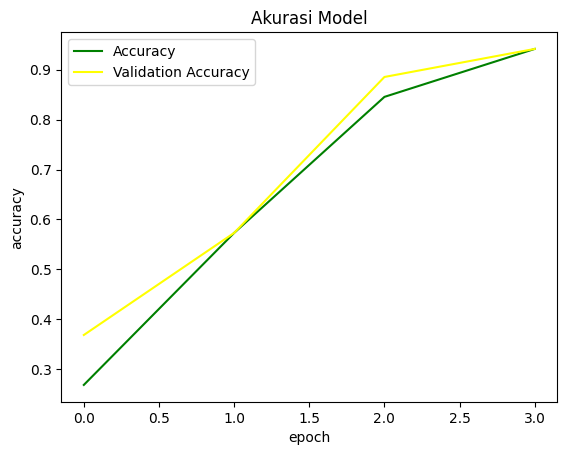

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_model.history['accuracy'], color='green', label='Train Accuracy')
plt.plot(history_model.history['val_accuracy'], color='yellow', label='Validation Accuracy')
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

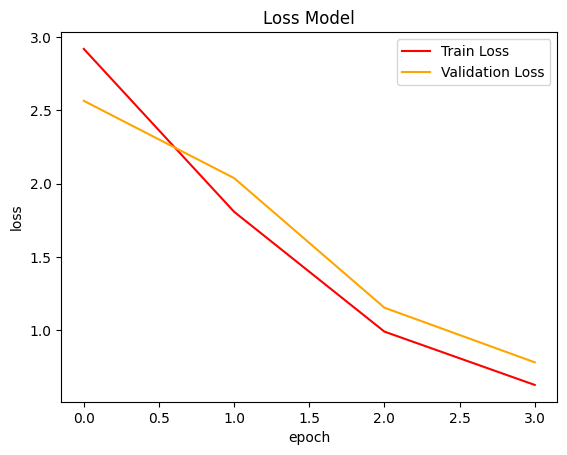

In [ ]:
plt.plot(history_model.history['loss'], color='red', label='Train Loss')
plt.plot(history_model.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()